In [7]:
# 📥 Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
import os
os.getcwd()

'c:\\Users\\Usuario\\Documents\\mobile-traffic-forecasting\\notebooks'

In [8]:
# 📂 Load dataset
df = pd.read_csv("../data/raw/Multivariate-Mobility-Paris.csv", sep=";")
df.head()

,Date,Hour,R1,R2,R3,R4,R5,R6
0,24/08/2020,00:00:00,100209,9885,11802,8783,2893,9076
1,24/08/2020,00:30:00,95213,11148,12184,8286,2895,9034
2,24/08/2020,01:00:00,85383,9647,9769,6320,1681,8104
3,24/08/2020,01:30:00,79010,6530,12188,6967,2413,8333
4,24/08/2020,02:00:00,74321,7071,12501,5720,2812,1696


In [9]:
# 🔹 Create datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Hour'], dayfirst=True)
df.set_index('Datetime', inplace=True)

In [10]:
# 🔹 Select column R1 and resample to hourly resolution
series = df[['R1']].resample('1H').sum()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17460\497999308.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series = df[['R1']].resample('1H').sum()


In [11]:
# 🔹 Interpolate missing values
series['R1'] = series['R1'].replace(0, np.nan)
series['R1'] = series['R1'].interpolate(method='linear')

In [12]:
# 🔹 Convert values to thousands
series = series / 1000

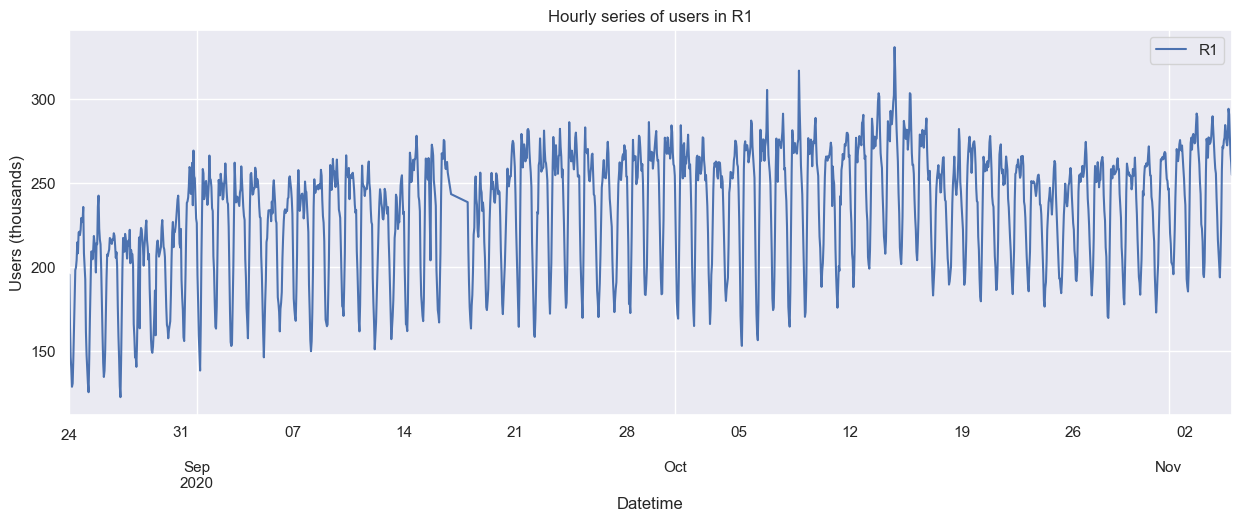

In [13]:
# 🔹 Plot the series
series.plot(figsize=(15,5))
plt.ylabel('Users (thousands)')
plt.title('Hourly series of users in R1')
plt.show()

In [14]:
# 🔹 Basic statistics
series.describe()

,R1
count,1752.000000
mean,233.654136
std,35.311281
min,122.534000
25%,207.977500
50%,242.387500
75%,260.898000
max,330.622000


In [16]:
# Saving dataset
series.to_csv("../data/processed/R1_hourly.csv")